In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [5]:
planck_z['z'].quantile(0.1), planck_z['z'].quantile(0.9)

(0.06730000000000001, 0.4797)

In [6]:
planck_z['M500'].quantile(0.1), planck_z['M500'].quantile(0.9)

(2.2764118, 7.302801400000003)

In [7]:
act = pd.read_csv('/home/rt2122/Data/clusters/actwp.csv')

In [16]:
qmin=0.1
qmax=0.9

In [17]:
act = act[act['z'] > planck_z['z'].quantile(qmin)]
act = act[act['z'] < planck_z['z'].quantile(qmax)]
act = act[act['M500'] > planck_z['M500'].quantile(qmin)]
act = act[act['M500'] < planck_z['M500'].quantile(qmax)]

In [14]:
pz14 = pd.read_csv('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv')
pz14 = pz14[pz14['z'] != -1]
tp = pz14[pz14['status'] == 'tp']
fn = pz14[pz14['status'] == 'fn']

actwp = pd.read_csv('/home/rt2122/Data/clusters/actwp.csv')

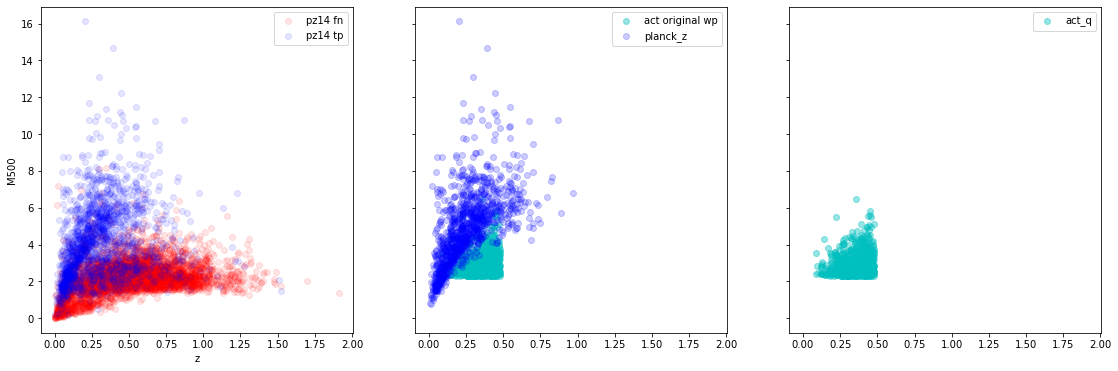

In [18]:
_, ax = plt.subplots(1, 3, figsize=(19, 6), sharex=True, sharey=True)
s = ax[0].scatter(fn['z'], fn['M500'], c='r', alpha=0.1)
s.set_label('pz14 fn')
s = ax[0].scatter(tp['z'], tp['M500'], c='b', alpha=0.1)
s.set_label('pz14 tp')
ax[0].set_xlabel('z')
ax[0].set_ylabel('M500')
ax[0].legend()

s = ax[1].scatter(act['z'], act['M500'], c='c', alpha=0.4)
s.set_label('act original wp')
s = ax[1].scatter(planck_z['z'], planck_z['M500'], c='b', alpha=0.2)
s.set_label('planck_z')
ax[1].legend()

s = ax[2].scatter(act['z'], act['M500'], c='c', alpha=0.4)
s.set_label('act_q')
ax[2].legend()

In [19]:
act.to_csv('/home/rt2122/Data/clusters/acts/act_q0.1_0.9.csv', index=False)